In [1]:
import numpy as np
import pandas as pd
import datetime
import torch.optim as optim
from scipy import io
import argparse
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import h5py  
import matplotlib.pyplot as plt
import matplotlib
# print(matplotlib.__version__)
# matplotlib.use('Agg')
import h5py  

from PIL import Image
import math
from sklearn.metrics import confusion_matrix
import pylab as pl
import numpy as np
import itertools
import torchvision

In [2]:
matrix_size = int(256)

# pf_line = int(np.floor(matrix_size*0.45))
pf_line = int(np.floor(matrix_size*0.25))
pf_line_com = matrix_size-pf_line
pf_line_o =int(np.floor(256*0.25)) 
SS_flag =1
MS_flag =0
EMS_flag =0

In [3]:
pf_line_com

192

In [4]:
data_file = '/home/alphabet/DL-PF/singlecoil_codes/singlecoil_dataset/train/e14292s3_P85504.7.npy'


In [5]:
kspace = np.load(data_file)


kspace_r = kspace[:,:,:,0]
kspace_i = kspace[:,:,:,1]


data = kspace_r + 1j * kspace_i

In [6]:
data.shape

(170, 256, 256)

In [7]:
# Reconstruct images for all slices using inverse Fourier transform
img = np.fft.ifftn(data, axes=(1, 2))

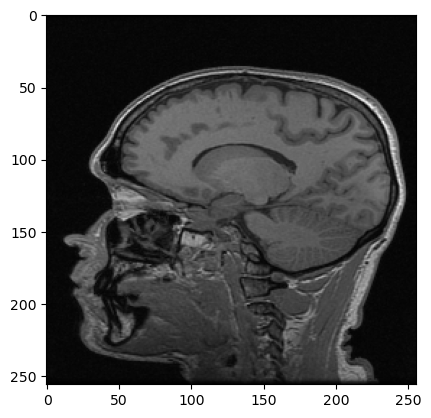

In [8]:
plt.imshow(np.abs(img[100,:,:]),cmap='gray')

In [12]:
img1 = np.fft.fftshift(img)

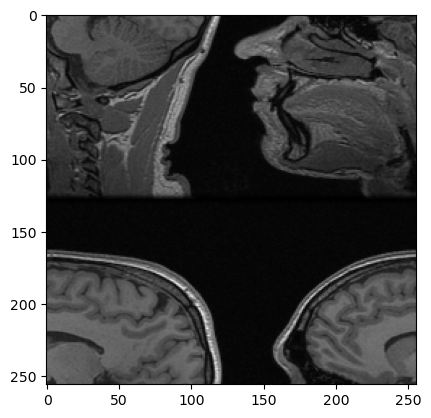

In [13]:
plt.imshow((np.abs(img1[10,:,:])),cmap='gray')

In [16]:
# if SS_flag ==1:
#     img_ref  = img[1:sz[0]-1,:,:,:]*0
#     for k in range(1,sz[0]-1):
#         img_ref[k-1,:,:,:] = img[k,:,:,:]
# else:
#     img_ref = np.concatenate((img[1:sz[0]-1,:,:,:]*0,img[1:sz[0]-1,:,:,:]*0,img[1:sz[0]-1,:,:,:]*0),axis = 1)
#     for k in range(1,sz[0]-1):
#         img_ref[k-1,:,:,:] = np.concatenate((img[k,:,:,:],  img[k-1,:,:,:], img[k+1,:,:,:]), axis =0)  

In [17]:
img_ref = img

In [18]:
img_ref.shape

(170, 1, 256, 256)

In [19]:
a = int(sz[2]/2)
freq= np.fft.ifftshift(img_ref ,axes=(2,3))
freq= np.fft.fft2(freq ,axes=(2,3))
test_k= 1/np.sqrt(sz[1]*sz[2])*np.fft.fftshift(freq,axes=(2,3))   
test_data = np.copy(test_k)
test_data[:,0,:,pf_line:a] = 0

# test_data[:,0,:pf_line_o,:] = 0 
# test_data[:,0,pf_line_o:128,:] = 0 

In [20]:
freq= np.fft.ifftshift(test_data ,axes=(2,3))
freq = np.fft.ifft2(freq,axes=(2,3))
img = np.sqrt(sz[1]*sz[2])*np.fft.ifftshift(freq,axes=(2,3))
img = np.fft.fftshift(img)

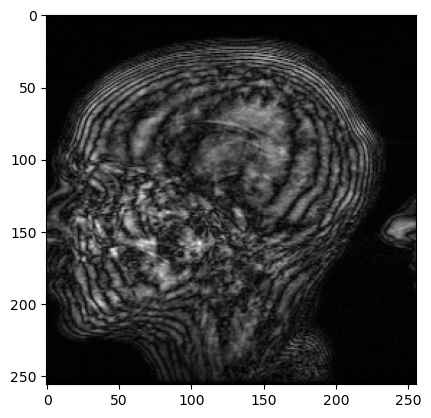

In [21]:
plt.imshow(np.abs(img[16,0,:,:]),cmap='gray')

In [20]:
test_data.shape

(170, 1, 256, 256)

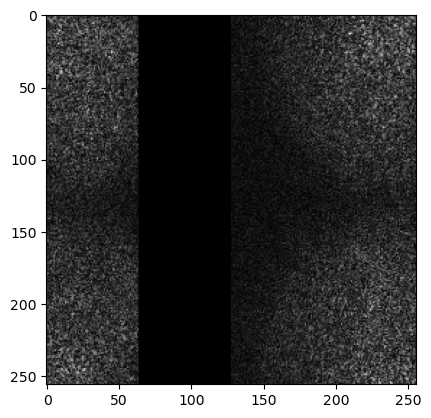

In [37]:
plt.imshow((np.abs(test_data[169,0,:,:])),cmap='gray')

In [22]:
pf_line_com

192

In [25]:
freq = np.fft.ifftshift(test_data,axes=(2,3))
freq = np.fft.ifft2(freq ,axes=(2,3))
img_data = np.sqrt(sz[1]*sz[2])*np.fft.fftshift(freq,axes=(2,3))   

img_label =img_ref[:,0,:,:] -img_data[:,0,:,:]
img_label =img_label.reshape(sz[0],-1,sz[1],sz[2])



In [26]:
img_label.shape

(170, 1, 256, 256)

In [27]:
imgdataR = np.copy(np.real(img_data))
imgdataI = np.copy(np.imag(img_data))

imgdata = np.concatenate((imgdataR,imgdataI), axis=1)



imglabelR = np.copy(np.real(img_label))
imglabelI = np.copy(np.imag(img_label))
imglabel = np.concatenate((imglabelR,imglabelI), axis=1)


imgfull=img_label[:,0,:,:] + img_data[:,0,:,:]
imgfull =imgfull.reshape(sz[0],-1,sz[1],sz[2])

In [28]:
test_data.shape

(170, 1, 256, 256)

In [29]:
# label = np.zeros((170, 1, 256, 256), dtype=np.complex128) 

# for i in range(sz[0]):
#     label[i,0,:,:] = test_k[i,0,:,:] - test_data[i,0,:,:]

In [33]:
label[:,0,:,:] = test_k[:,0,:,:] - test_data[:,0,:,:]

In [34]:
l = np.squeeze(label[16,0,:,:])

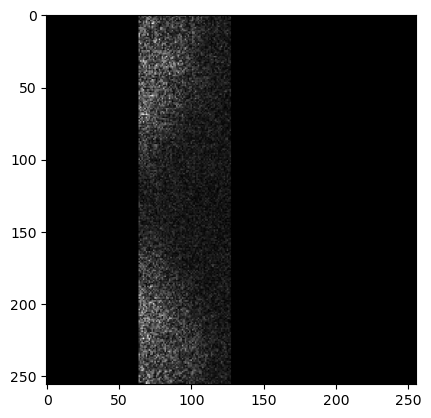

In [35]:
plt.imshow(np.abs(l),cmap='gray')

In [46]:
kspace_real = np.copy(np.real(test_data))
kspace_imag = np.copy(np.imag(test_data))

kspacedata = np.concatenate((kspace_real,kspace_imag), axis=1)


label = test_k[:,0,:,:] - test_data[:,0,:,:]
label = label.reshape(sz[0],-1,sz[1],sz[2])
label_real = np.copy(np.real(label))
label_imag = np.copy(np.imag(label))

labeldata = np.concatenate((label_real,label_imag), axis=1)

In [48]:
label.shape

(170, 1, 256, 256)

In [50]:
la = np.squeeze(label[16,0,:,:])

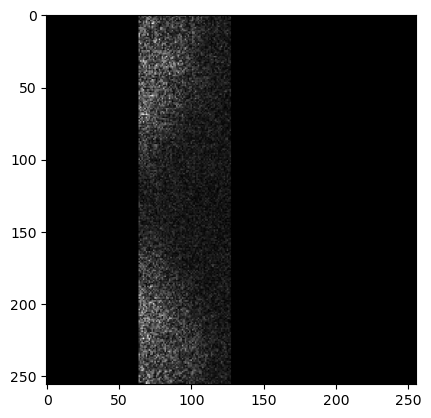

In [51]:
plt.imshow(np.abs(la),cmap='gray')

In [52]:
total = test_data[:,0,:,:] + label [:,0,:,:]

In [55]:
t = np.squeeze(total[16,:,:])

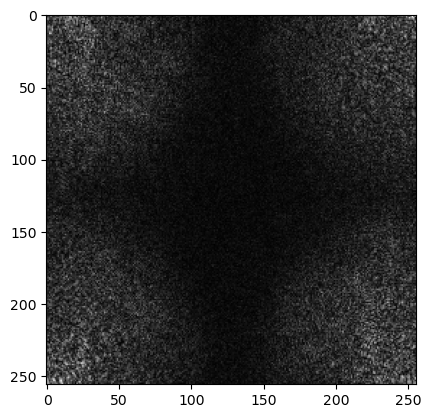

In [57]:
plt.imshow(np.abs(t),cmap='gray')

In [60]:
freq= np.fft.ifftshift(t ,axes=(0,1))
freq = np.fft.ifft2(freq,axes=(0,1))
img = np.fft.ifftshift(freq,axes=(0,1))

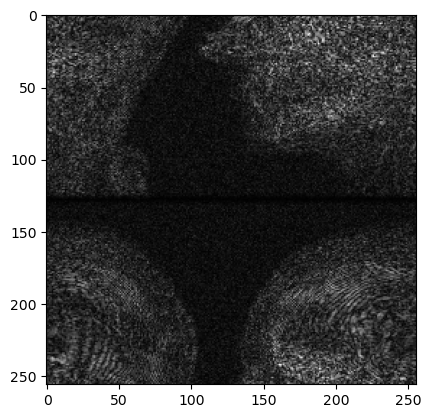

In [61]:
plt.imshow(np.abs(img),cmap='gray')